In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from DikinSamplers import RandomWalk, Langevin, DikinLangevin

# Defining the Constraints

Constrains assumed to be of the form $a_i\cdot x \leq 1$. Build the matrix $A$ such that $A_i=a_i$, that is $a_i$ are the row vectors of $A$. This would be for the $[-1,1]^d$

In [5]:
d = 10

A = np.concatenate([np.eye(d), -np.eye(d)], axis=0)
A_torch = torch.tensor(A, dtype=torch.float64)
A.shape

(20, 10)

# Define the distribution to sample from
The distribution should be the log density. No constraints need to be applied here.

In [3]:
log_pdf = lambda x: -0.5 * torch.linalg.norm(x, axis=-1) ** 2

# Run the Samplers

## Dikin-Langevin

In [19]:
num_iters = 5000

sampler = DikinLangevin(0.01, A_torch, log_pdf, e=1e-5)
history, accept_ratio = sampler.run(num_iters)

print(f"{history.shape}; Acceptance Ratio = {accept_ratio}")

100%|███████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 907.29it/s, Acc. Prob 0.790]

(5000, 10); Acceptance Ratio = 0.7902


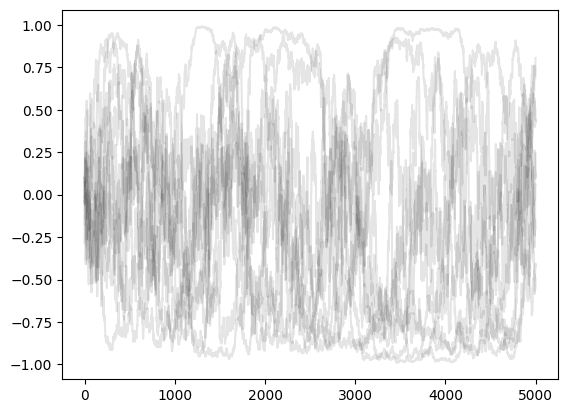

In [20]:
plt.plot(history, color='black', alpha=0.1);

# Dikin Random Walk

In [17]:
num_iters = 5000

sampler = RandomWalk(0.01, A_torch, log_pdf, e=1e-5)
history, accept_ratio = sampler.run(num_iters)

print(f"{history.shape}; Acceptance Ratio = {accept_ratio}")

 57%|████████████████████████████▋                     | 2866/5000 [00:02<00:01, 1212.40it/s, Acc. Prob 0.760]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1201.96it/s, Acc. Prob 0.765]

(5000, 10); Acceptance Ratio = 0.7654


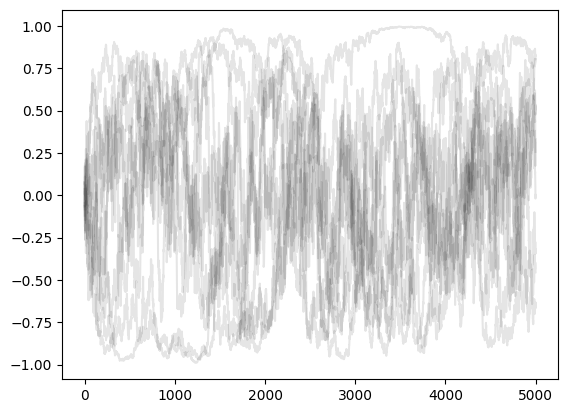

In [18]:
plt.plot(history, color='black', alpha=0.1);

## MALA

In [21]:
num_iters = 5000

sampler = Langevin(0.01, A_torch, log_pdf)
history, accept_ratio = sampler.run(num_iters)

print(f"{history.shape}; Acceptance Ratio = {accept_ratio}")

 58%|█████████████████████████████▏                    | 2919/5000 [00:02<00:01, 1311.47it/s, Acc. Prob 0.656]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1437.67it/s, Acc. Prob 0.654]


(5000, 10); Acceptance Ratio = 0.654


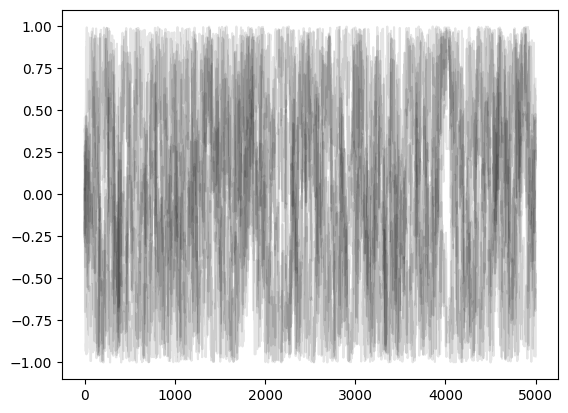

In [22]:
plt.plot(history, color='black', alpha=0.1);